In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5694,0983-TATYJ,Female,0,Yes,No,33,Yes,No,DSL,No,...,No,Yes,No,No,One year,Yes,Mailed check,51.45,1758.9,No
383,5167-ZFFMM,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.85,90.85,Yes
6494,4310-KEDTB,Female,0,No,Yes,26,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.5,No
6093,7110-BDTWG,Female,0,Yes,No,71,No,No phone service,DSL,No,...,Yes,Yes,No,Yes,Two year,Yes,Electronic check,47.05,3263.6,No


In [4]:
df.drop("customerID",axis = 1,inplace = True)
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1388,Female,0,Yes,Yes,12,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),58.35,740.55,No
2797,Male,0,No,No,3,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.95,329.95,Yes
3712,Male,0,No,No,44,Yes,No,DSL,Yes,No,No,Yes,Yes,No,One year,No,Electronic check,65.40,2774.55,No
2306,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.85,199.85,No


In [5]:
df.shape

(7043, 20)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.to_numeric(df.TotalCharges,errors = "coerce" )

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
pd.to_numeric(df.TotalCharges,errors = "coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors = "coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [11]:
df.iloc[488]["TotalCharges"]

' '

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df1 = df[df["TotalCharges"]!= " "]

In [14]:
df1.shape

(7032, 20)

In [15]:
df1_TotalCharges  = pd.to_numeric(df1.TotalCharges)

In [16]:
df1_TotalCharges.dtypes

dtype('float64')

Text(0.5, 1.0, 'Customer Churn Prediction visualization')

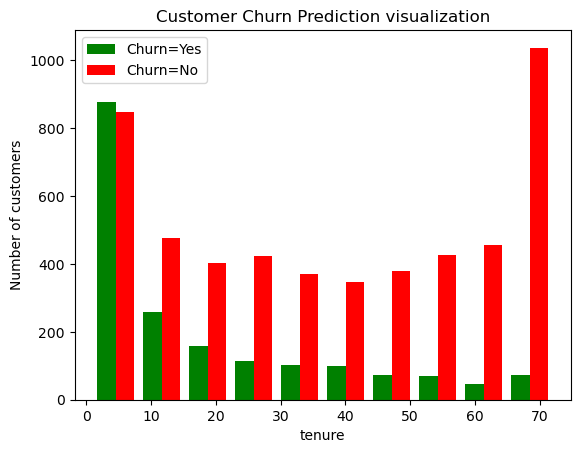

In [17]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction visualization")
          

Text(0.5, 1.0, 'Customer monthly Charges Prediction Visualization')

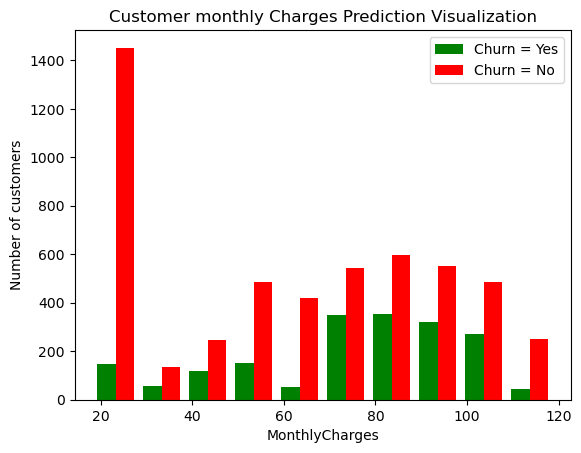

In [18]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn=="Yes"].MonthlyCharges 
plt.hist([mc_churn_yes, mc_churn_no], color=["green", "red"], label=["Churn = Yes", "Churn = No"])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of customers")
plt.title("Customer monthly Charges Prediction Visualization")

In [19]:
for column in df:
    print(f"{column}:{df[column].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [20]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column}:{df[column].unique()}")

In [21]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [22]:
df1.replace("No internet service","No",inplace = True)
df1.replace("No phone service","No",inplace = True)

C:\Users\abc\AppData\Local\Temp\ipykernel_24436\4252314850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace = True)
C:\Users\abc\AppData\Local\Temp\ipykernel_24436\4252314850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace = True)


In [23]:
df1["MultipleLines"].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df1["OnlineSecurity"].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
yes_no_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
                 "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for col in yes_no_columns:
    df1[col].replace({"Yes":1,"No":0},inplace = True)

C:\Users\abc\AppData\Local\Temp\ipykernel_24436\3132470202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0},inplace = True)


In [26]:
df1["MultipleLines"].unique()

array([0, 1], dtype=int64)

In [27]:
df1["gender"].replace({"Female":1,"Male":0},inplace = True)

C:\Users\abc\AppData\Local\Temp\ipykernel_24436\1631345110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female":1,"Male":0},inplace = True)


In [28]:
df1["gender"].unique()

array([1, 0], dtype=int64)

In [29]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [30]:
df1_TotalCharges  = pd.to_numeric(df1["TotalCharges"],errors ="coerce")

In [31]:
df1_TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [32]:
df2 = pd.get_dummies(data = df1,columns =["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4975,0,0,1,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
4768,0,1,1,1,0.985915,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1499,0,1,1,0,0.887324,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
5149,1,0,0,0,0.859155,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [35]:
for column in df2:
    print(f"{column}:{df2[column].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [36]:
x = df2.drop("Churn",axis =1)
y = df2.Churn

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [38]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [48]:
!pip install tensorflow

In [49]:
import tensorflow as tf
from tensorflow import keras 
from sklearn.metrics import confusion_matrix,classification_report

In [50]:

def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([ 
        keras.layers.Dense(26, input_dim=26, activation="relu"),
        keras.layers.Dense(15, activation="relu"), 
        keras.layers.Dense(1, activation="sigmoid")
    ])  
    
    model.compile(optimizer="adam", loss=loss, metrics=["accuracy"]) 
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=100)
    else:
        model.fit(x_train, y_train, epochs=100, class_weight=weights) 
            
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report:\n", classification_report(y_test, y_preds))
    
    return y_preds
   

 




     
        

    
  
    
   

    


In [51]:
y_preds = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7450 - loss: 0.5545
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7874 - loss: 0.4390
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7949 - loss: 0.4191
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8014 - loss: 0.4229
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8048 - loss: 0.4100
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8108 - loss: 0.4077
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8131 - loss: 0.4006
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8137 - loss: 0.3984
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8100 - loss: 0.4060
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8102 - loss: 0.4085
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8086 - loss: 0.4050
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.3763
Epoch 69/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.3664
Epoch 70/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.3603
Epoch 71/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.3736
Epoch 72/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.3659
Epoch 73/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.3768
Epoch 74/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.3722
Epoch 75/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8276 - loss: 0.3684
Epoch 76/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.3644
Epoch 77/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8382 - loss: 0.3572
Epoch 78/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8353 - loss: 0.3573
Epoch 79/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [52]:
count_class_0,count_class_1 = df1.Churn.value_counts()
df_class_0 = df2[df2["Churn"]==0]
df_class_1 = df2[df2["Churn"]==1]


In [53]:
count_class_0,count_class_1

(5163, 1869)

In [54]:
df_class_0.shape

(5163, 27)

In [55]:
df_class_1.shape

(1869, 27)

In [56]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6153,0,0,1,1,0.830986,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
760,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [57]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [58]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0) 
print("Random under-sampling:")
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [59]:
x = df_test_under.drop("Churn",axis = 1)
y = df_test_under["Churn"]

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 15,stratify =y)

In [61]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [62]:
y_preds = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6105 - loss: 0.6453
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7515 - loss: 0.5147
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.4977
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7554 - loss: 0.4928
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7751 - loss: 0.4738
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.4723
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.4775
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7718 - loss: 0.4869
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.4934
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7714 - loss: 0.4809
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.4838
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8205 - loss: 0.3916
Epoch 70/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8081 - loss: 0.3982
Epoch 71/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8086 - loss: 0.4104
Epoch 72/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8042 - loss: 0.4112
Epoch 73/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8149 - loss: 0.3922
Epoch 74/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8077 - loss: 0.4065
Epoch 75/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8003 - loss: 0.4072
Epoch 76/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8045 - loss: 0.4119
Epoch 77/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8204 - loss: 0.3842
Epoch 78/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8309 - loss: 0.3917
Epoch 79/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.3912
Epoch 80/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8

# Method 2 Oversampling

In [63]:
count_class_0,count_class_1

(5163, 1869)

In [64]:
df_class_1_over = df_class_1.sample(count_class_0,replace = True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0) 
print("Random over-sampling :")
print(df_test_over.Churn.value_counts())

Random over-sampling :
0    5163
1    5163
Name: Churn, dtype: int64


In [65]:
x = df_test_over.drop("Churn",axis=1)
y = df_test_over["Churn"]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 15,stratify =y)

In [67]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [68]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [69]:
y_preds = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6955 - loss: 0.5899
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7631 - loss: 0.4955
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7696 - loss: 0.4893
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7616 - loss: 0.4945
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7691 - loss: 0.4801
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7716 - loss: 0.4735
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7718 - loss: 0.4728
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7778 - loss: 0.4763
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7855 - loss: 0.4651
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7801 - loss: 0.4599
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.4619
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8169 - loss: 0.3947
Epoch 69/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8155 - loss: 0.3997
Epoch 70/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8099 - loss: 0.4097
Epoch 71/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.4045
Epoch 72/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.3951
Epoch 73/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8259 - loss: 0.3861
Epoch 74/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.3899
Epoch 75/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.3934
Epoch 76/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.4007
Epoch 77/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8195 - loss: 0.3977
Epoch 78/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8250 - loss: 0.3836
Epoch 79/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 

# Method Smote

In [175]:
x = df2.drop("Churn",axis = 1)
y = df2["Churn"]

In [176]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [183]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
x_sm,y_sm = smote.fit_sample(x,y)
y_sm.value_counts()



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\abc\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

# Method 4 Ensemble with undersampling

In [79]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [80]:
x = df2.drop("Churn",axis = 1)
y = df2["Churn"]

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =15,stratify =y)

In [82]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [83]:
4130/1495

2.762541806020067

In [76]:
4130/3

1376.6666666666667

In [86]:
df3 = x_train.copy()
df3["Churn"] = y_train

In [87]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [88]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [89]:
def get_train_batch(df_majority,df_minority,start,end): 
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    x_train = df_train.drop("Churn",axis =1)
    y_train = df_train.Churn 
    return x_train,y_train

In [91]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)
x_train.shape

(2990, 26)

In [94]:
y_pred1 = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5775 - loss: 0.6679
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7534 - loss: 0.5256
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7525 - loss: 0.5027
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7735 - loss: 0.4857
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7569 - loss: 0.4939
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7651 - loss: 0.4856
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7728 - loss: 0.4684
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7779 - loss: 0.4836
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7867 - loss: 0.4654
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7679 - loss: 0.4812
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7950 - loss: 0.4572
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accurac

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8225 - loss: 0.3808
Epoch 70/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8226 - loss: 0.3836
Epoch 71/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8240 - loss: 0.3884
Epoch 72/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8178 - loss: 0.4004
Epoch 73/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8249 - loss: 0.3891
Epoch 74/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8327 - loss: 0.3810
Epoch 75/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8003 - loss: 0.4062
Epoch 76/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8300 - loss: 0.3787
Epoch 77/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8193 - loss: 0.3856
Epoch 78/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8244 - loss: 0.3893
Epoch 79/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8292 - loss: 0.3873
Epoch 80/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8

In [93]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2 = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5288 - loss: 0.6795
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7641 - loss: 0.5442
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7560 - loss: 0.4982
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7718 - loss: 0.4810
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7741 - loss: 0.4670
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7710 - loss: 0.4722
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7712 - loss: 0.4715
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7883 - loss: 0.4557
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7746 - loss: 0.4629
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7977 - loss: 0.4356
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7859 - loss: 0.4497
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accur

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8193 - loss: 0.4013
Epoch 70/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8214 - loss: 0.3870
Epoch 71/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8317 - loss: 0.3678
Epoch 72/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8361 - loss: 0.3753
Epoch 73/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8260 - loss: 0.3871
Epoch 74/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8222 - loss: 0.3965
Epoch 75/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8335 - loss: 0.3759
Epoch 76/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8302 - loss: 0.3849
Epoch 77/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8451 - loss: 0.3589
Epoch 78/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.3831
Epoch 79/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8181 - loss: 0.3894
Epoch 80/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.

In [99]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6527 - loss: 0.6319
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7665 - loss: 0.5128
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7637 - loss: 0.4990
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7583 - loss: 0.5012
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7785 - loss: 0.4816
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.4710
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.4547
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7715 - loss: 0.4784
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7850 - loss: 0.4618
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7862 - loss: 0.4621
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7858 - loss: 0.4515
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8206 - loss: 0.3981
Epoch 70/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8286 - loss: 0.3788
Epoch 71/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8202 - loss: 0.3937
Epoch 72/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8201 - loss: 0.3957
Epoch 73/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - loss: 0.3799
Epoch 74/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8226 - loss: 0.3877
Epoch 75/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8196 - loss: 0.3969
Epoch 76/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252 - loss: 0.3885
Epoch 77/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.3855
Epoch 78/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8342 - loss: 0.3687
Epoch 79/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8260 - loss: 0.3771
Epoch 80/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8

In [96]:
len(y_pred1)

1407

In [97]:
len(y_pred2)

1407

In [100]:
len(y_pred3)

1407

In [104]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    
    if n_ones>1:
        y_pred_final[i]= 1
    else:
        y_pred_final[i] =0

In [106]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      1033
           1       0.46      0.81      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407

